In [1]:
import torch
import torchvision
from torchvision import transforms,datasets

In [2]:
train=datasets.MNIST("",train=True,download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
#zero segment is image
#1 segment label
x=data[0][1] #image  er second image value
y=data[1][1] # label er second value

In [6]:
print(y)

tensor(1)


In [7]:
x.shape

torch.Size([1, 28, 28])

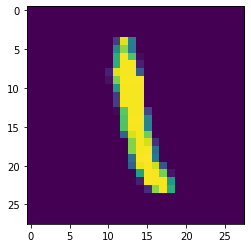

In [8]:
#show 1

import matplotlib.pyplot as plt


plt.imshow(x.view(28,28))
plt.show()

# Create CNN  

In [13]:
import torch.nn as nn
import torch.nn.functional as f

In [17]:
class Net(nn.Module): # Module is library package
    
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(28*28, 64)  #flatten the image 28*28 input, first layer output 64
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)  # image labels are 10
        
        
    def forward(self,x): # pass the data
        
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x=self.fc4(x)
        
        return f.log_softmax(x,dim=1)
               

net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)

In [19]:
Epoch=3

for epoch in range(Epoch): # how many times we want to iterate
    
    for data in trainset:
        X,y=data
        
        net.zero_grad()
        
        output=net(X.view(-1,28*28))  # pass data to nn
        
        loss=f.nll_loss(output,y)  #calculate loss
        
        loss.backward()
        
        optimizer.step()
    print(loss)
    
    

tensor(0.0748, grad_fn=<NllLossBackward>)
tensor(0.1007, grad_fn=<NllLossBackward>)
tensor(0.0548, grad_fn=<NllLossBackward>)


In [25]:
for data1 in testset:
    print(data1)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [26]:
x=data1[0][1] #image  er second image value
y=data1[1][1] # label er second value

In [27]:
y

tensor(5)

In [30]:
print(torch.argmax(net(x.view(-1,28*28))[0]))

tensor(5)


In [31]:
## NN predict the digit very well